(a) To begin, load in the Boston data set, which is part of the ISLP library.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


(b) How many rows are in this data set? How many columns? What do the rows and columns represent?
-> 506 rows, 13 columns. Each row is a suburb, and each column is a predictor.

In [4]:
Boston.shape

(506, 13)

In [5]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

* crim – per capita crime rate by town
* zn – proportion of residential land zoned for lots over 25,000 sq.ft.
* indus – proportion of non-retail business acres per town
* chas – Charles River dummy variable (=1 if tract bounds river; 0 otherwise)
* nox – nitric oxides concentration (parts per 10 million)
* rm – average number of rooms per dwelling
* age – proportion of owner-occupied units built prior to 1940
* dis – weighted distances to five Boston employment centers
* rad – index of accessibility to radial highways
* tax – full-value property tax rate per 10,000 dollars
* ptratio – pupil–teacher ratio by town
* lstat – percentage of lower status population
* medv – median value of owner-occupied homes (in 1000s, response variable)

(c) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

In [11]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


1. rm and medv: Positive correlation
* The more rooms (rm) a house has, the higher the median house value (medv). This is a clear linear positive relationship.

2. lstat and medv: Strong negative correlation
* The higher the percentage of lower status population (lstat), the lower the median house value (medv). This relationship is very strong and almost linear.

3. lstat and rm: Negative correlation
* Areas with more rooms tend to have a lower percentage of lower status population, indicating that higher-end houses are usually located in higher socioeconomic neighborhoods.

4. crim and other variables: Weaker but noticeable trends
* crim and medv: Weak negative correlation — neighborhoods with higher crime rates tend to have lower house values.
* crim and lstat: Weak positive correlation — neighborhoods with higher proportions of lower status population tend to have higher crime rates.

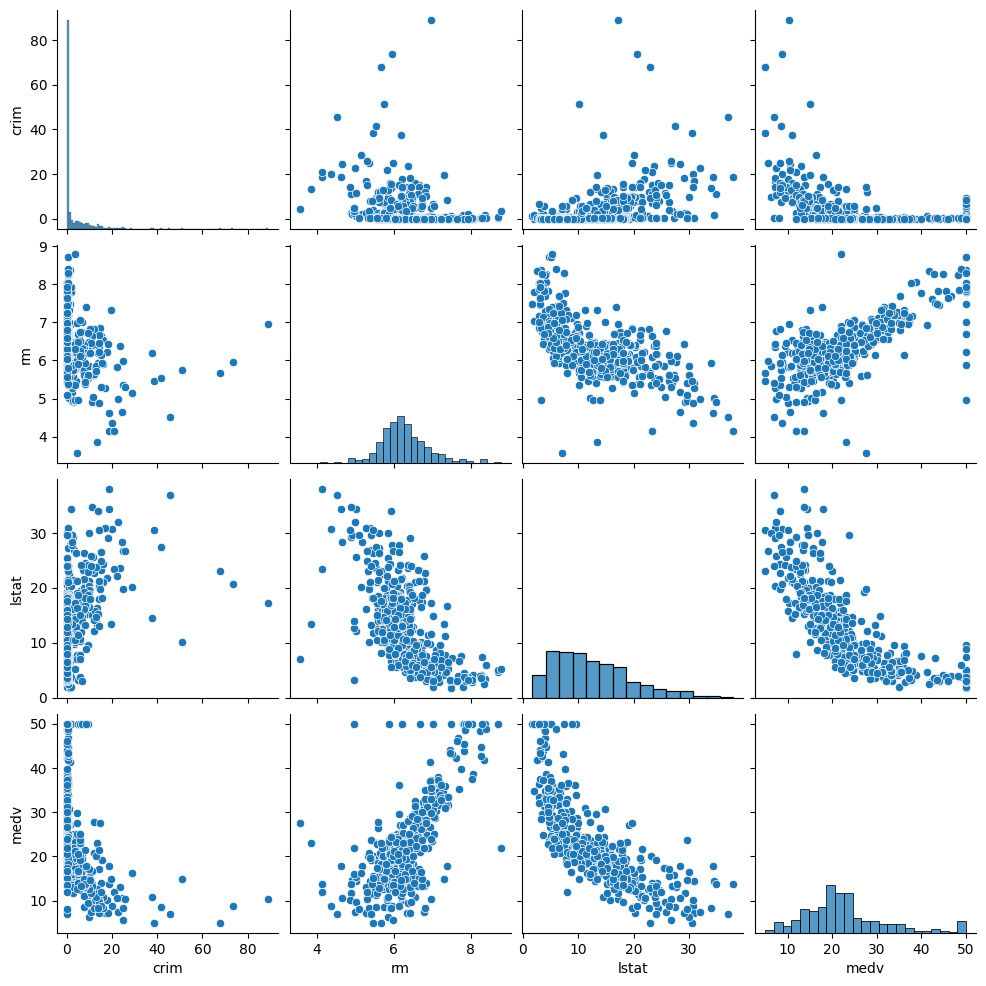

In [13]:
import seaborn as sns
sns.pairplot(Boston[['crim','rm','lstat','medv']])

(d) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

rad (0.626) and tax (0.583) have the strongest positive correlation with crime rate.
→ Areas with higher accessibility to radial highways and higher property tax rates tend to have higher crime rates.

In [15]:
Boston.corr()['crim']

crim       1.000000
zn        -0.200469
indus      0.406583
chas      -0.055892
nox        0.420972
rm        -0.219247
age        0.352734
dis       -0.379670
rad        0.625505
tax        0.582764
ptratio    0.289946
lstat      0.455621
medv      -0.388305
Name: crim, dtype: float64

(e) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

In [16]:
C = ['crim','tax','ptratio']
Boston[C].describe()

,crim,tax,ptratio
count,506.000000,506.000000,506.000000
mean,3.613524,408.237154,18.455534
std,8.601545,168.537116,2.164946
min,0.006320,187.000000,12.600000
25%,0.082045,279.000000,17.400000
50%,0.256510,330.000000,19.050000
75%,3.677083,666.000000,20.200000
max,88.976200,711.000000,22.000000


1. Crime rate (crim):
* The maximum is 88.98, which is extremely large compared to the median (0.26) and even the 75th percentile (3.68). This indicates that a few suburbs have exceptionally high crime rates, while most suburbs have relatively low crime.

2. Tax rate (tax):
* The range goes from 187 to 711, with a median of 330. The 75th percentile is already 666, suggesting that many suburbs fall into either a low-tax or high-tax group, with some suburbs having unusually high property tax rates.

3. Pupil-teacher ratio (ptratio):
* Values range from 12.6 to 22.0, with a median of 19.05. Compared with crime and tax, the spread here is narrower, though a few suburbs still have relatively high ratios near 22.

(f) How many of the suburbs in this data set bound the Charles river?
-> 35 suburbs

In [21]:
(Boston['chas'] == 1).sum()

np.int64(35)

(g) What is the median pupil-teacher ratio among the towns in this data set?
-> 19.05

In [22]:
Boston['ptratio'].median()

np.float64(19.05)

(h) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings. 
低房價郊區通常犯罪率高 (crim)、低收入人口比例高 (lstat)、房間數少 (rm)、稅率高 (tax)。
這符合「高犯罪、貧窮、教育資源差 → 房價低」的直覺。

In [26]:
lmv = Boston['medv'].min()
lowest = Boston[Boston['medv']==lmv]
lowest

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


(i) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms per dwelling. 擁有 >8 房間的郊區房價非常高，通常對應豪宅區。通常犯罪率低 (crim)、教育資源佳 (ptratio 低)、低收入人口比例 (lstat) 很小。

In [31]:
rm7up = (Boston['rm'] >7).sum() 
rm8up = (Boston['rm'] >8).sum() 
b8 = Boston[Boston['rm']>8]
rm7up, rm8up, b8

(np.int64(64),
 np.int64(13),
         crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
 97   0.12083   0.0   2.89     0  0.4450  8.069  76.0  3.4952    2  276   
 163  1.51902   0.0  19.58     1  0.6050  8.375  93.9  2.1620    5  403   
 204  0.02009  95.0   2.68     0  0.4161  8.034  31.9  5.1180    4  224   
 224  0.31533   0.0   6.20     0  0.5040  8.266  78.3  2.8944    8  307   
 225  0.52693   0.0   6.20     0  0.5040  8.725  83.0  2.8944    8  307   
 226  0.38214   0.0   6.20     0  0.5040  8.040  86.5  3.2157    8  307   
 232  0.57529   0.0   6.20     0  0.5070  8.337  73.3  3.8384    8  307   
 233  0.33147   0.0   6.20     0  0.5070  8.247  70.4  3.6519    8  307   
 253  0.36894  22.0   5.86     0  0.4310  8.259   8.4  8.9067    7  330   
 257  0.61154  20.0   3.97     0  0.6470  8.704  86.9  1.8010    5  264   
 262  0.52014  20.0   3.97     0  0.6470  8.398  91.5  2.2885    5  264   
 267  0.57834  20.0   3.97     0  0.5750  8.297  67.0  2.4216    5  26